<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
This is the data that is received by the neural network. It is the only layer that interacts directly with the initial data.

### Hidden Layer: 
This is the "black box" of the neural network. The hidden layer(s) takes the data from the input layer and make something of it. This is where the calculations happen based on the input layer.

### Output Layer: 
Outputs a vector of values that are used to make a prediction. The number of nodes within this layer depends on what type of problem we are trying to solve. For example, regression problems will have one node with a continuously variable number as the output. A binary classification problem will have two nodes, one yes and one no (this is where the sigmoid function might be used). The example on the video showed 10 nodes in the output layer as there were ten possible outputs we were predicting.

Activation functions (like the sigmoid function) are used to transform the output into a contextually understandable format.

### Neuron:
Also called 'nodes', a neuron is a part of the NN that stores a value. Similar to the way that our brains function, these nodes pass on signals to the next node only when a certain threshold is reached. 

Neurons take an input value, multiply them by a specified weight, sums up all of the products and then passes the through an activation function which gives us the final value.

### Weight:
Is similar to the slope of a line: it modifies the input by multiplying it by a specified number, just like y = 3x. In my mind, I think of it as the importance of the input. The weight that is applied to the input data helps determine how accurate the model is. 

### Activation Function:
Each node has an activation funciton. Nodes in the same layer typically have the same activation function. The activation function is what determines whether or not a node is activated or not. Within the output layer, activation functions make the output interpretable.

### Node Map:
Basically, it's a flow chart of how the neurons interact with each other. Usually they are color coded and help us understand the different architectures of different kinds of neural networks at a high level.

### Perceptron:
The simplest kind of neural network. Has an input layer and an output layer, but nothing else. The input layer can have many inputs and spits out an output.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here
1. Input
Data is collected in the input layer. This is the only place that the original data interacts with the neural network.

2. Weights
The input is then multiplied/modified by a given weight. These weights are added together to find the weighted sum.

3. Bias
The bias is then added to the weighted sum

4. Activation Funcitons 
The activation function takes the values of the weighted sums and the bias in order to determine which neurons to activate in the following layer.

5. Output
Output is determined by the acivation function

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [2]:
# define a sigmoid function as the activation function

import math 
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx*(1-sx)


In [3]:
# define inputs
inputs = np.array(df) # why do we use the y column for our inputs?
inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [4]:
# initialize some random weights to begin
np.random.seed(812)
weights = np.random.random((3,1))
weights

array([[0.5049808 ],
       [0.60592761],
       [0.45748719]])

In [5]:
# calculate the weighted sums of inputs and weights
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[0.45748719],
       [0.96246799],
       [1.06341479],
       [1.11090841]])

In [6]:
# output the activated value for the end of 1 training epoch
activated_outputs = sigmoid(weighted_sum)
activated_outputs

array([[0.6124179 ],
       [0.72361567],
       [0.74334258],
       [0.75229843]])

In [7]:
# take the difference of output and true values to calculate error
correct_outputs = [[1],[1],[1],[0]]
error = correct_outputs - activated_outputs
error

array([[ 0.3875821 ],
       [ 0.27638433],
       [ 0.25665742],
       [-0.75229843]])

In [8]:
# use gradient descent to adjust weights
adjustments = error * sigmoid_derivative(weighted_sum)
adjustments

array([[ 0.09199735],
       [ 0.05527577],
       [ 0.04896623],
       [-0.14018743]])

In [9]:
# find the new, more accurate weights
weights = weights + np.dot(inputs.T, adjustments)
weights

array([[0.42006914],
       [0.51470641],
       [0.65372654]])

In [11]:
# update the weights 100,000 times

for iteration in range(100000):
    # weighted sum of inputs/weights
    weighted_sum = np.dot(inputs, weights)
    
    # activate
    activated_output = sigmoid(weighted_sum)
    
    # calculate error
    error = correct_outputs - activated_output
    
    # use gradient descent to adjust weights
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # update the weights
    weights += np.dot(inputs.T, adjustments)
    
print("weights after training")
print(weights)

print("output after training")
print(activated_output)

weights after training
[[-3.16683474]
 [-3.16679153]
 [ 9.7567521 ]]
output after training
[[0.9999421 ]
 [0.99862773]
 [0.99862779]
 [0.00177244]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [13]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [14]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

# X = ...
feats

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
# convert the data into a numpy array and exclude the outcomes column
diabetes_array = np.array(diabetes[feats])

# fit the normalizer
transformer = Normalizer().fit(diabetes_array)

# transform the data in the diabetes array to normalized values
norm_diabetes = transformer.transform(diabetes_array)
norm_diabetes[0]

array([0.03355237, 0.82762513, 0.40262844, 0.19572216, 0.        ,
       0.18789327, 0.00350622, 0.27960308])

In [21]:
new_df = pd.DataFrame(norm_diabetes, columns = feats)
new_df['Outcome'] = diabetes['Outcome']
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603,1
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591,1
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655,1


In [29]:
# define inputs 
inputs = np.array(new_df)

# correct outcomes or y
correct_outcomes = np.array(new_df['Outcome'])
print(len(correct_outcomes))
print(len(new_df))
print(len(inputs))
inputs

768
768
768


array([[0.03355237, 0.82762513, 0.40262844, ..., 0.00350622, 0.27960308,
        1.        ],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.00295683, 0.26114412,
        0.        ],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.00339341, 0.16159073,
        1.        ],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.00131885, 0.16149234,
        0.        ],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.00232192, 0.31269379,
        1.        ],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.00249308, 0.18203439,
        0.        ]])

In [26]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.niter = niter
        self.rate = rate
    
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(x):
        sx = sigmoid(x)
        return sx*(1-sx)
    
    def net_input(self, X):
        """calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        # if the predicted value is equal to or greater than .5, return 1. Otherwise return 0
        return np.where(self.net_input(X) >= .5, 1, 0) 
    
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.random.random(1 + X.shape[1]) # what does this line of code do?
        
        # calculate misclassifications
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                
            # Weighted sum of inputs / weights
                predictions = self.predict(xi)
                delta_w = self.rate * (target - predictions) # predictions comes from the predict function defined below
                
                # activate
                self.weight[1:] += delta_w * xi
                
                # update the weights
                self.weight[0] += delta_w
                
                # calculate error
                if delta_w != 0.0:
                    err = err + 1
                
            self.errors.append(err)
        return self
    


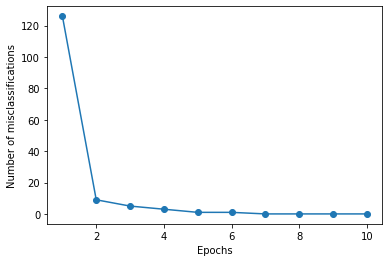

In [28]:
import matplotlib.pyplot as plt
pn = Perceptron(niter = 10)

# fit the perceptron to the normalized diabetes df features
pn.fit(inputs, correct_outcomes) # why is the prediction so eradic and random?
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?